In [1]:
import pandas as pd
import random

f = "accepted_2007_to_2018Q4.csv"

def limpieza_data():
    num_lines = sum(1 for i in open(f))

    size = 2_200_000
    ids = random.sample(range(1, num_lines), size)

    column_types = {
        '0': 'str',      
        '19': 'float',
        '59': 'str',
        '118': 'str',
        '129': 'float',
        '130': 'float',
        '131': 'str',
        '134': 'str',
        '135': 'float',
        '136': 'str',
        '139': 'float',
    }

    df = pd.read_csv(f, skiprows=ids, low_memory=False, dtype=column_types)

    # Limpieza de NaNs
    num = 150000
    num_nans = df.isnull().sum()
    columns_menos_nans = num_nans[num_nans < num].index
    df_sin_nans = df[columns_menos_nans]

    # Selección de columnas útiles
    df_limpio = df_sin_nans[[
        "id",
        "loan_amnt",
        "funded_amnt",
        "term",
        "int_rate",
        "installment",
        "grade",
        "emp_length",
        "annual_inc",
        "dti",
        "fico_range_high",
        "fico_range_low",
        "revol_util",
        "loan_status",
        "out_prncp",
        "total_rec_prncp",
        "total_rec_int",
        "last_fico_range_high",
        "last_fico_range_low",
        "open_acc",
        "pub_rec",
        "inq_last_6mths",
        "purpose",
        "home_ownership",
        "recoveries",
        "num_tl_90g_dpd_24m",
        "delinq_2yrs"
    ]]

    return df_limpio

df_limpio = limpieza_data()


In [2]:
df_limpio.to_csv("df_limpio_procesado.csv", index=False)


In [3]:
print(df_limpio.head())

         id  loan_amnt  funded_amnt        term  int_rate  installment grade  \
0  68446769     7000.0       7000.0   36 months      7.49       217.72     A   
1  68366999    15850.0      15850.0   60 months     23.13       448.01     F   
2  68587652    25000.0      25000.0   36 months      5.32       752.87     A   
3  68537564     8000.0       8000.0   36 months     10.78       261.08     B   
4  68376533    18000.0      18000.0   36 months      7.49       559.83     A   

  emp_length  annual_inc    dti  ...  last_fico_range_high  \
0  10+ years     59000.0  13.06  ...                 769.0   
1  10+ years     45000.0  34.85  ...                 744.0   
2     1 year    150000.0   9.54  ...                 784.0   
3   < 1 year     45000.0  21.23  ...                 769.0   
4    5 years     75000.0  25.65  ...                 529.0   

   last_fico_range_low  open_acc pub_rec  inq_last_6mths             purpose  \
0                765.0      10.0     0.0             1.0         c

In [4]:
print(df_limpio.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'annual_inc', 'dti', 'fico_range_high',
       'fico_range_low', 'revol_util', 'loan_status', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'last_fico_range_high',
       'last_fico_range_low', 'open_acc', 'pub_rec', 'inq_last_6mths',
       'purpose', 'home_ownership', 'recoveries', 'num_tl_90g_dpd_24m',
       'delinq_2yrs'],
      dtype='object')


In [5]:
#Historial de pagos: Podemos revisar variables como total_rec_prncp (capital recuperado) y total_rec_int (intereses recuperados) para ver cómo afectan el cumplimiento.
#Uso del crédito: Analizamos el out_prncp (principal restante) y el loan_amnt (monto del préstamo) para ver si el uso o el saldo restante afectan el comportamiento.
#Incumplimiento: Revisamos las variables como recoveries (recuperaciones) y el estatus del préstamo (loan_status) para entender qué diferencia a los usuarios que pagan por completo de los que no lo hacen.


In [6]:

df_limpio['loan_status_binary'] = df_limpio['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

print(df_limpio['loan_status_binary'].value_counts())


loan_status_binary
0    31869
1    28832
Name: count, dtype: int64


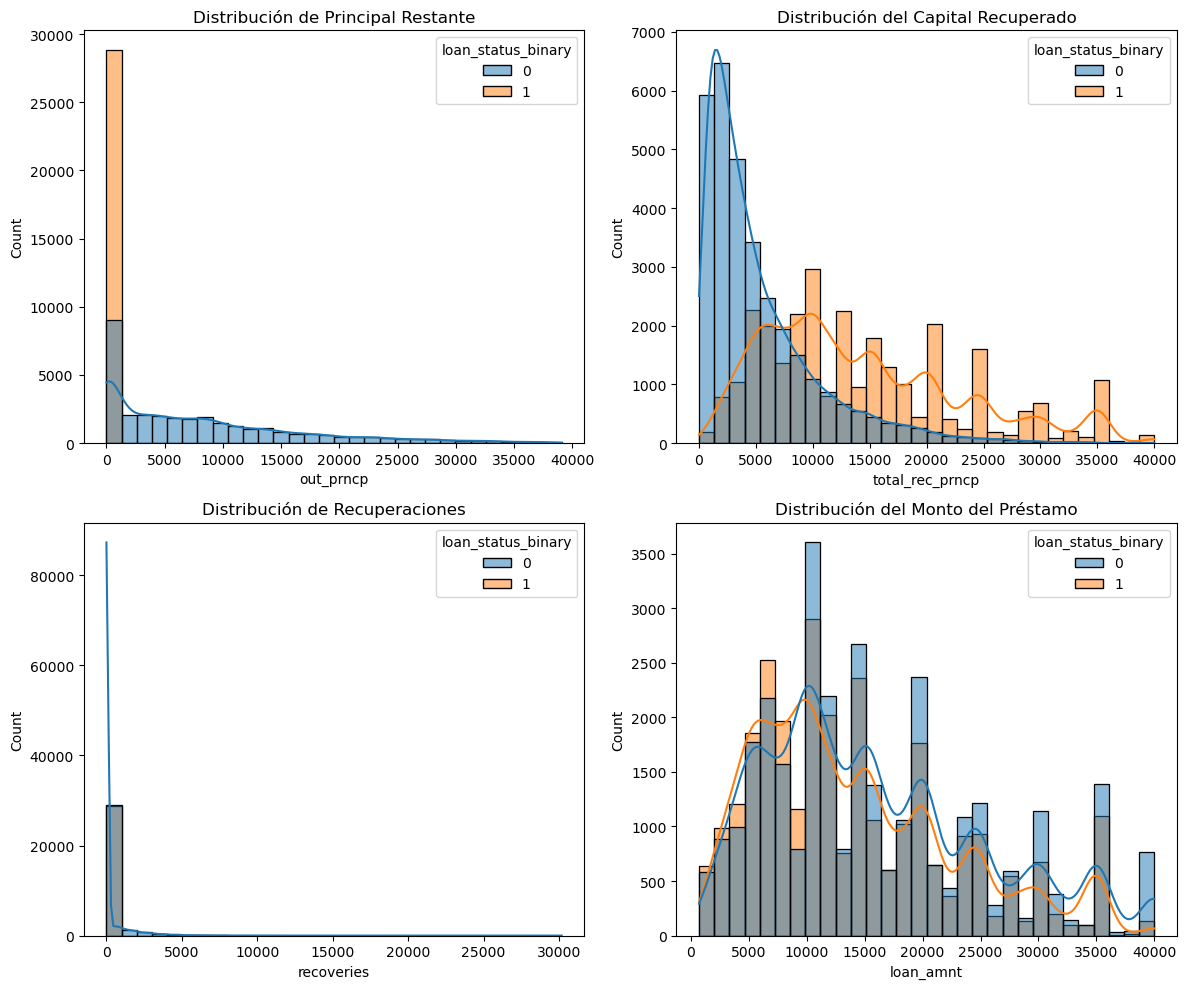

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(12, 10))


sns.histplot(df_limpio, x='out_prncp', hue='loan_status_binary', bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Principal Restante')


sns.histplot(df_limpio, x='total_rec_prncp', hue='loan_status_binary', bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribución del Capital Recuperado')

sns.histplot(df_limpio, x='recoveries', hue='loan_status_binary', bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Recuperaciones')


sns.histplot(df_limpio, x='loan_amnt', hue='loan_status_binary', bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribución del Monto del Préstamo')

plt.tight_layout()
plt.show()


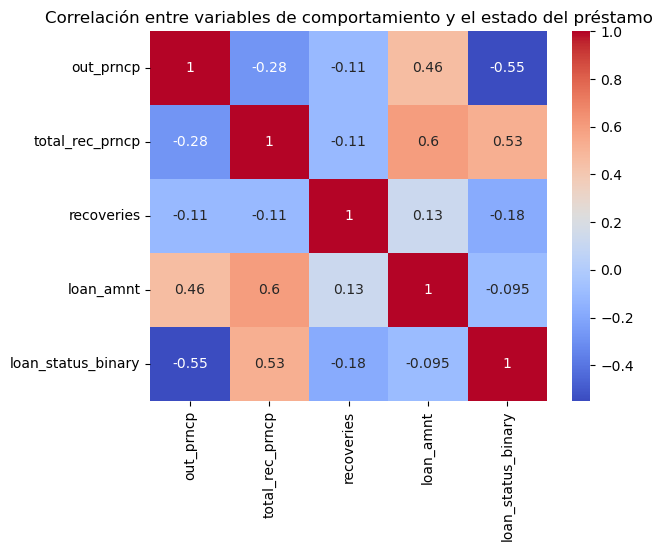

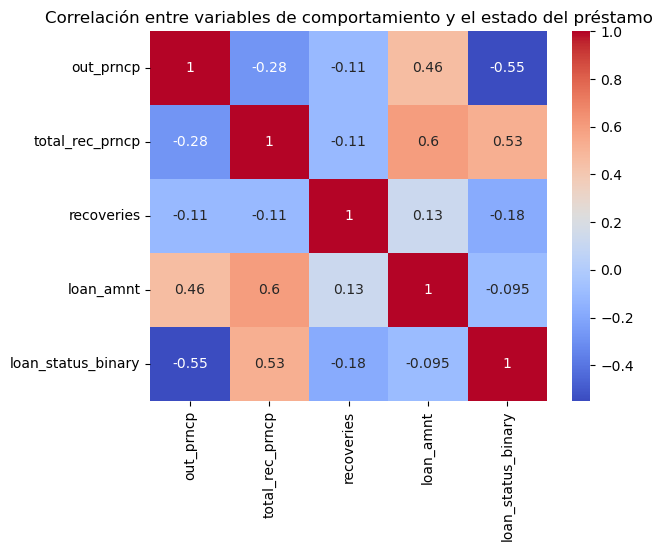

In [8]:
# Correlación entre las variables de comportamiento y loan_status_binary
corr_matrix = df_limpio[['out_prncp', 'total_rec_prncp', 'recoveries', 'loan_amnt', 'loan_status_binary']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables de comportamiento y el estado del préstamo')
plt.show()

corr_matrix = df_limpio[['out_prncp', 'total_rec_prncp', 'recoveries', 'loan_amnt', 'loan_status_binary']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables de comportamiento y el estado del préstamo')
plt.show()


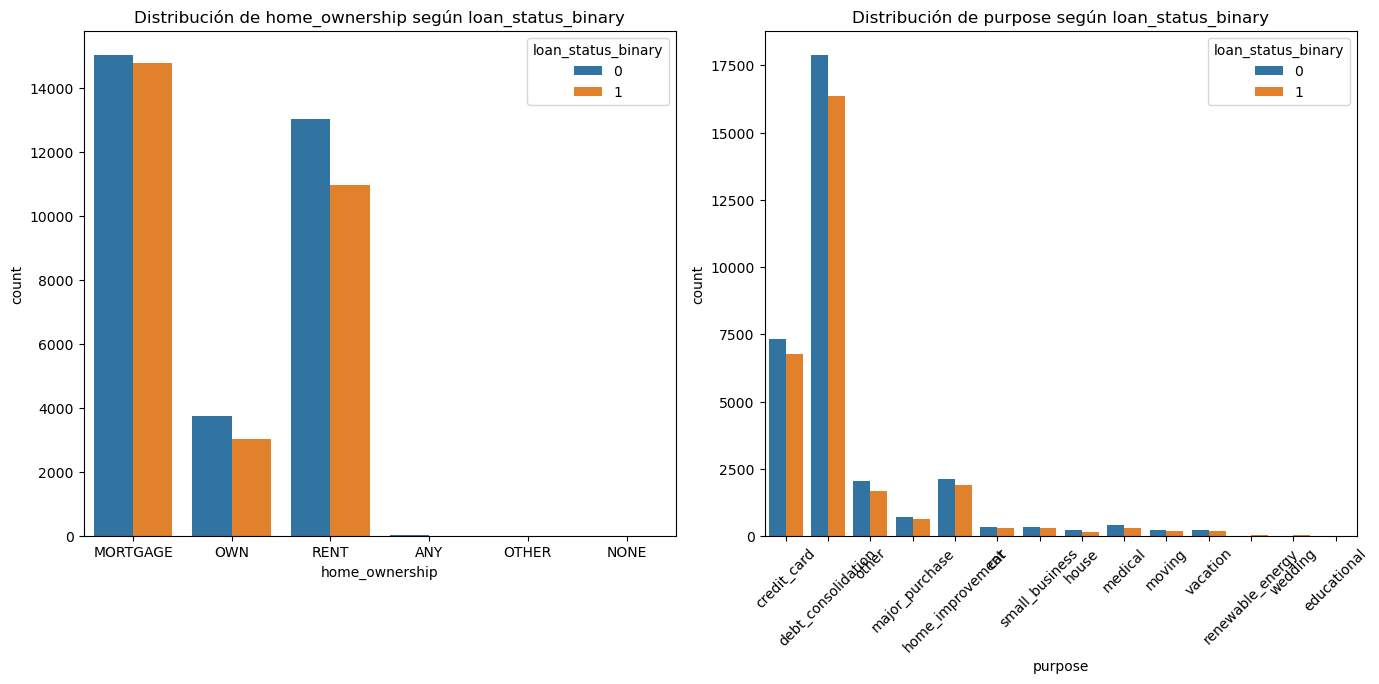

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


sns.countplot(data=df_limpio, x='home_ownership', hue='loan_status_binary', ax=axs[0])
axs[0].set_title('Distribución de home_ownership según loan_status_binary')


sns.countplot(data=df_limpio, x='purpose', hue='loan_status_binary', ax=axs[1])
axs[1].set_title('Distribución de purpose según loan_status_binary')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
